[1] "Sample 1:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  97.08   99.38  100.01  100.01  100.64  102.94 
[1] "Sample 2:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  98.72  102.27  103.03  102.96  103.63  106.50 
[1] ""
[1] "Testing each sample for parametric assumptions:"

	Shapiro-Wilk normality test

data:  samp
W = 0.99803, p-value = 0.2951


	Shapiro-Wilk normality test

data:  samp2
W = 0.99731, p-value = 0.09463


	F test to compare two variances

data:  samp and samp2
F = 0.9192, num df = 999, denom df = 999, p-value = 0.1832
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8119319 1.0406494
sample estimates:
ratio of variances 
         0.9192042 

[1] "The sample data met the parametric assumptions of normality and equal variances."

	Welch Two Sample t-test

data:  samp and samp2
t = -66.233, df = 1994.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidenc

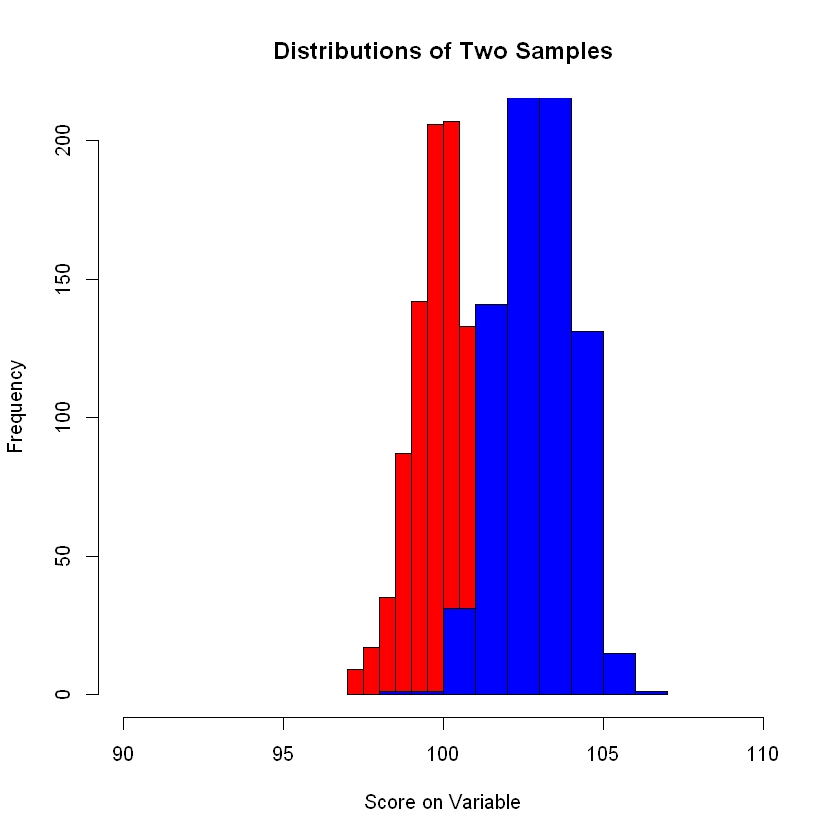

[1] "P-value obtained from permutation test = "
[1] 0


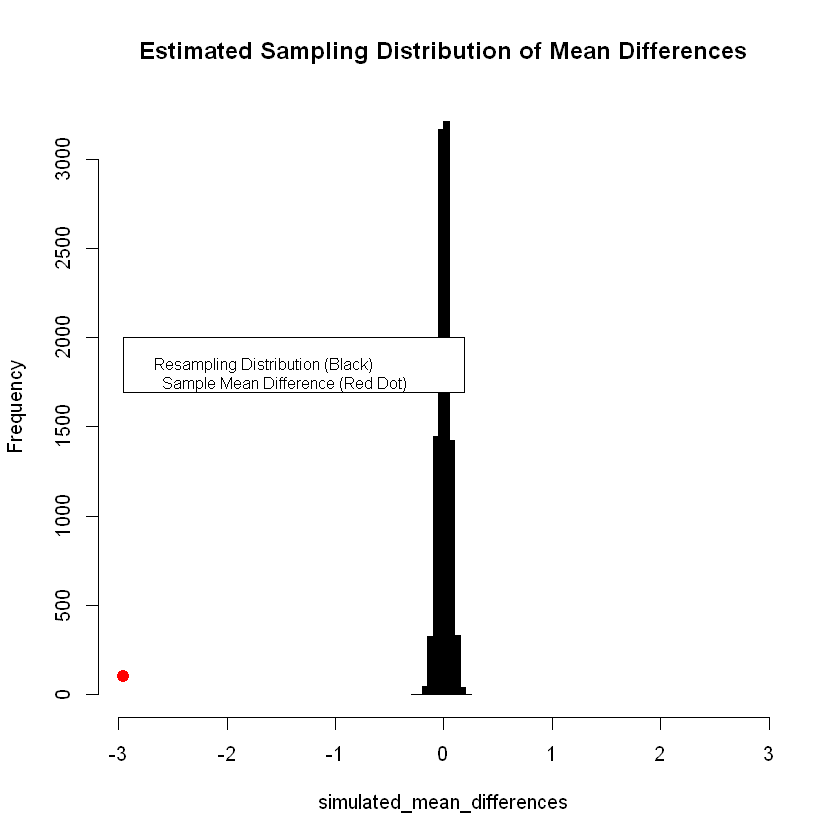

In [4]:
# generating two normally distributed populations

pop1 = rnorm(mean = 100, 10000)
pop2 = rnorm(mean = 103, 10000)

# generating a 'coinflip' to decide whether H0 will be true or false
coin = c(0,1)
coinflip = sample(coin, size = 1)

# generating a sample from the H0 population if the coinflip == 1

if (coinflip == 1){
    samp = sample(pop1, size = 1000)
    samp2 = sample(pop1, size = 1000)
    hist(samp, main = 'Distributions of Two Samples',
        xlab = 'Score on Variable', xlim = c(90,110), col = 'red')
    hist(samp2, add = TRUE, col = 'blue')}
   

# generating a sample from a different population if the coinflip == 0

if (coinflip == 0){
   samp = sample(pop1, size = 1000)
    samp2 = sample(pop2, size = 1000)
    hist(samp, main = 'Distributions of Two Samples',
        xlab = 'Score on Variable', xlim = c(90,110), col = 'red')
    hist(samp2, add = TRUE, col = 'blue')}

print('Sample 1:')
print(summary(samp))
print('Sample 2:')
print(summary(samp2))

print('')
print('Testing each sample for parametric assumptions:')
norm_test_samp = shapiro.test(samp)
print(norm_test_samp)
norm_test_samp2 = shapiro.test(samp2)
print(norm_test_samp2)
f_test = var.test(samp,samp2)
print(f_test)

if(norm_test_samp$p.value  > 0.05 & norm_test_samp2$p.value > 0.05 & f_test$p.value > 0.05){
        print('The sample data met the parametric assumptions of normality and equal variances.')
        res = t.test(samp,samp2)
        print(res)
        sd_pooled = sqrt((var(samp)+var(samp2))/2)
        mean_diff = mean(samp) - mean(samp2)
        cohen_d = mean_diff/sd_pooled
        print("Cohen's d =")
        print(cohen_d)
        if(res$p.value < 0.05){print('There was a significant difference between the means of the samples.')
                      }else{print('There was a NOT significant difference between the means of the samples.')}
        }else{print('Parametric assumptions not met! Consider a nonparametric test.')}


# performing a permutation test (regardless of whether the samples are normally distributed)

mean_diff = mean(samp) - mean(samp2)

sample_size_one = length(samp)
sample_size_two = length(samp2)

combined = append(samp, samp2)

simulated_mean_differences = c()

n_iters = 10000

for(i in seq(n_iters)){sim_one = sample(combined, sample_size_one)
                   sim_two = sample(combined, sample_size_two)
                   sim_diff = mean(sim_one) - mean(sim_two)
                   simulated_mean_differences = append(simulated_mean_differences, sim_diff)}

graph_max = max(c(abs(min(simulated_mean_differences)), abs(max(simulated_mean_differences)), abs(mean_diff)))
graph_min = min(c(min(simulated_mean_differences), mean_diff))

hist(simulated_mean_differences, main = 'Estimated Sampling Distribution of Mean Differences', 
     xlim = c(graph_min, graph_max), col = 'black')
points(mean_diff, y = n_iters/100, col = 'red', pch = 20, cex = 2) 
legend(x = graph_min, y = n_iters/5,cex = 0.8,  legend = 'Resampling Distribution (Black) \n  Sample Mean Difference (Red Dot)')

# calculating a p value for the permutation test (proportion of resampled mean differences an equal or more extreme abolsute 
# distance from the sampling distribution mean as the actual sample mean difference)
grtr_than_actual = subset(simulated_mean_differences, abs(simulated_mean_differences- mean(simulated_mean_differences)) >= abs(mean_diff- mean(simulated_mean_differences)))

permutation_p = length(grtr_than_actual)/length(simulated_mean_differences)

print('P-value obtained from permutation test = ')
print(permutation_p)
